<a href="https://colab.research.google.com/github/Andrew-Negrut/MachineLearning/blob/main/GaussianDiscriminantAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [310]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.datasets import make_classification

In [311]:
import random

In [312]:
# 100 data points
m = 100

In [313]:
# generate data
x, y = make_classification(n_samples=m, n_features=2, n_redundant=0)

In [314]:
# add colors to visualize classes

colors = []
for i in range(m):
  if y[i] == 0:
    colors.append('red')
  else:
    colors.append('blue')

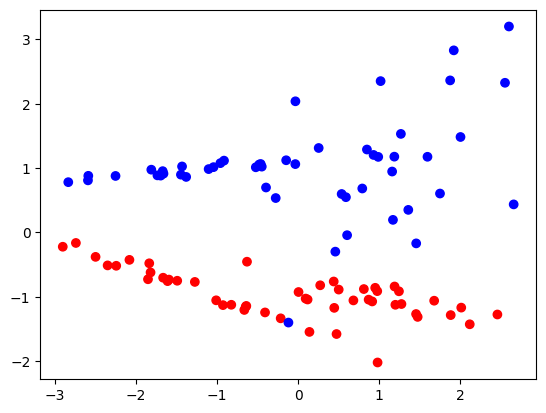

In [315]:
plt.scatter(x[:, 0], x[:, 1], c=colors)

In [316]:
# calculate optimal value of phi
y_sum = 0
for i in range(m):
  y_sum += y[i]

phi = y_sum / m

phi

0.5

In [317]:
# calculate optimal value of mu0
part1 = np.zeros(2)
part2 = 0

for i in range(m):
  if y[i] == 0:
    part1 += x[i]
    part2 += 1

mu0 = (part1 / part2).copy()

mu0

array([-0.14672748, -0.96117125])

In [318]:
# calculate optimal value of mu1
part1 = np.zeros(2)
part2 = 0

for i in range(m):
  if y[i] == 1:
    part1 += x[i]
    part2 += 1

mu1 = (part1 / part2).copy()

mu1

array([0.02950855, 1.00786019])

In [319]:
# calculate optimal value of sigma
sum = np.zeros([2, 2])

for i in range(m):
  if y[i] == 0:
    sum += np.outer((x[i] - mu0), (x[i] - mu0))
  else:
    sum += np.outer((x[i] - mu1), (x[i] - mu1))

sigma = (sum / m).copy()

sigma

array([[ 2.05290285, -0.02880411],
       [-0.02880411,  0.34302038]])

In [320]:
# make a prediction on an input point

def predict(x_inp):
  prob0 = (1 - phi) * (1 / (2 * math.pi * math.sqrt(
      np.linalg.det(sigma)))) * math.exp(-0.5 * np.dot
       (((x_inp - mu0).T)@(np.linalg.inv(sigma)), (x_inp - mu0)))

  prob1 = phi * (1 / (2 * math.pi * math.sqrt(
      np.linalg.det(sigma)))) * math.exp(-0.5 * np.dot
       (((x_inp - mu1).T)@(np.linalg.inv(sigma)), (x_inp - mu1)))

  if prob0 >= prob1:
    return 0
  else:
    return 1

In [321]:
# run a couple of quick tests

In [322]:
predict(np.array([-2, -2]))

0

In [323]:
predict(np.array([2, 2]))

1

In [324]:
predict(np.array([-2, 2]))

1

In [325]:
predict(np.array([2, -2]))

0

In [326]:
# generate data for more comprehensive test

x0_test = []
x1_test = []

for i in range(20):
  x0_test.append(random.randint(int(np.min(x[:, 0])), int(np.max(x[:, 0]))))
  x1_test.append(random.randint(int(np.min(x[:, 1])), int(np.max(x[:, 1]))))

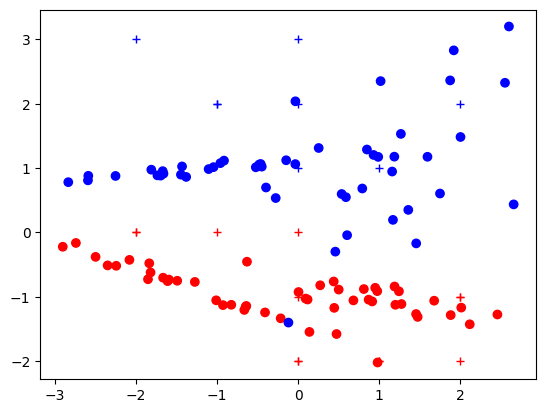

In [327]:
# more comprehensive tests; '+' indicates a sample test input point

plt.scatter(x[:, 0], x[:, 1], c=colors)

for i in range(20):
  if predict(np.array([x0_test[i], x1_test[i]])) == 0:
    plt.plot(x0_test[i], x1_test[i], 'r+')
  else:
    plt.plot(x0_test[i], x1_test[i], 'b+')

plt.show()